In [1]:
#import packages
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
import calendar


In [18]:
# read in the data, start to explore it
os.chdir('C:/Learning/ML/springboard_projects/interview_takehome_challenge/ultimate_challenge')
with open('logins.json') as json_file:
    data = pd.DataFrame(json.load(json_file))
    
print("data.head():\n", data.head())    
print("")
print("data.describe():\n", data.describe())
print("")
print("Number of missing values:", sum(data.isna().values)[0])



data.head():
             login_time
0  1970-01-01 20:13:18
1  1970-01-01 20:16:10
2  1970-01-01 20:16:37
3  1970-01-01 20:16:36
4  1970-01-01 20:26:21

data.describe():
                  login_time
count                 93142
unique                92265
top     1970-03-29 03:24:57
freq                      3

Number of missing values: 0


In [19]:
# create a new variable as a DatetimeIndex
data['times'] = pd.DatetimeIndex(data.login_time)


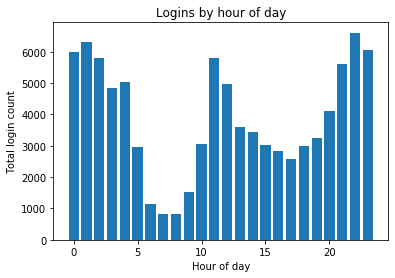

In [20]:
# look at the data by hour of day
hours = pd.DatetimeIndex(data.login_time).hour
hour_counts = hours.value_counts().sort_index()

plt.figure()
plt.bar(hour_counts.index, hour_counts.values)
plt.xlabel("Hour of day")
plt.ylabel("Total login count")
plt.title("Logins by hour of day")
plt.show()

The daily volume follows a clear pattern. From 0:00 to 5:00, usage dwindles as users go to bed. The lowest usage is in the morning, quickly ramping up until noon. There is a lull in the afternoon which then builds back up in the evening until midnight.

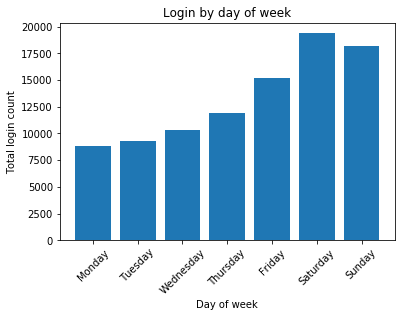

In [23]:

days = pd.DatetimeIndex(data.login_time).day
day_counts = days.value_counts()

days_of_week = pd.DatetimeIndex(data.login_time).dayofweek
day_of_week_counts = days_of_week.value_counts().sort_index()
import calendar
day_names = []
for i in range(7):
   day_names.append(calendar.day_name[i])

plt.figure()
plt.bar(day_names, day_of_week_counts.values)
plt.xticks(rotation=45)
plt.xlabel("Day of week")
plt.ylabel("Total login count")
plt.title("Login by day of week")
plt.show()

Usage is at the lowest during the week, but it steadily increases from Monday to Friday. Then there is a peak during the weekend, with Friday through Sunday being the three days with the most usage.

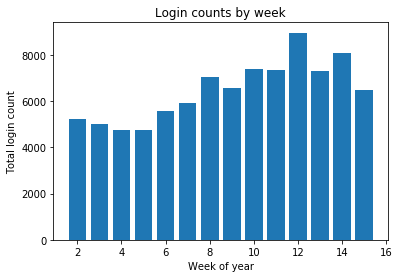

In [25]:
weeks_of_year = pd.DatetimeIndex(data.login_time).weekofyear
week_of_year_counts = weeks_of_year.value_counts().sort_index()

#remove the first and last weeks (incomplete data)
week_of_year_counts = week_of_year_counts.iloc[1:15]

plt.figure()
plt.bar(week_of_year_counts.index, week_of_year_counts.values)
plt.xlabel("Week of year")
plt.ylabel("Total login count")
plt.title("Login counts by week")
plt.show()


After a few slower weeks, usage began ramping up around week 6. The most recent week in the dataset has been lower than many of the weeks preceeding it, but it is not immediately clear if there is any meaning behind it. 